# DSD Test

## Loading Modules

In [2]:
include("../src/ModuleLEPEE.jl")
import .ModuleLEPEE: Cr_dsd, dsdBest, dsdMP, dsdOffShore
using Plots
using NamedArrays

## Defining functions

| Site | mean | Std Dev | Hours/year | Rainfall (mm/year)|
|---|---|---|---|---|
|Recommended| -0.8 | 1.2 | -- | 1000 |
|Seattle|-0.55 |1.02| 915|890|
|Pacific Coast|-0.10|1.05|1700|2670|
|Miami|-0.10|1.60|450|1300|
|Hilo|-0.10|1.30|1500|3160|


In [30]:
dsdbestRecommended(diameter) = dsdBest(diameter,T=984.32, mu=-2.28, sigma=1.46);
dsdbestSeattle(diameter)=dsdBest(diameter,T=709.56, mu=-2.57, sigma=1.53);
dsdbestPC(diameter)= dsdBest(diameter,T=1152.44, mu=-2.37, sigma=1.57);
dsdbestMiami(diameter)= dsdBest(diameter,T=1383.05, mu=-2.23,sigma= 1.5);
dsdbestHilo(diameter)= dsdBest(diameter,T=629.34, mu=-2.66, sigma=1.55);

dsdMPRecommended(diameter) = dsdMP(diameter,T=984.32, mu=-2.28, sigma=1.46);
dsdMPSeattle(diameter)=dsdMP(diameter,T=709.56, mu=-2.57, sigma=1.53);
dsdMPPC(diameter)= dsdMP(diameter,T=1152.44, mu=-2.37, sigma=1.57);
dsdMPMiami(diameter)= dsdMP(diameter,T=1383.05, mu=-2.23,sigma= 1.5);
dsdMPHilo(diameter)= dsdMP(diameter,T=629.34, mu=-2.66, sigma=1.55);

dsdoffshoreRecommended(diameter) = dsdOffShore(diameter,T=984.32, mu=-2.28, sigma=1.46);
dsdoffshoreSeattle(diameter)=dsdOffShore(diameter,T=709.56, mu=-2.57, sigma=1.53);
dsdoffshorePC(diameter)= dsdOffShore(diameter,T=1152.44, mu=-2.37, sigma=1.57);
dsdoffshoreMiami(diameter)= dsdOffShore(diameter,T=1383.05, mu=-2.23,sigma= 1.5);
dsdoffshoreHilo(diameter)= dsdOffShore(diameter,T=629.34, mu=-2.66, sigma=1.55);


## Computing Rain Coefficients

In [31]:
Cr_bestRecommended=Cr_dsd(dsdbestRecommended);
Cr_bestSeattle=Cr_dsd(dsdbestSeattle);
Cr_bestPC=Cr_dsd(dsdbestPC);
Cr_bestMiami=Cr_dsd(dsdbestMiami);
Cr_bestHilo=Cr_dsd(dsdbestHilo);
Cr_MPRecommended=Cr_dsd(dsdMPRecommended);
Cr_MPSeattle=Cr_dsd(dsdMPSeattle);
Cr_MPPC=Cr_dsd(dsdMPPC);
Cr_MPMiami=Cr_dsd(dsdMPMiami);
Cr_MPHilo=Cr_dsd(dsdMPHilo);
Cr_offshoreRecommended=Cr_dsd(dsdoffshoreRecommended);
Cr_offshoreSeattle=Cr_dsd(dsdoffshoreSeattle);
Cr_offshorePC=Cr_dsd(dsdoffshorePC);
Cr_offshoreMiami=Cr_dsd(dsdoffshoreMiami);
Cr_offshoreHilo=Cr_dsd(dsdoffshoreHilo);

## Results
### Table of Coefficients

In [45]:
Cr = NamedArray([Cr_bestRecommended Cr_bestSeattle Cr_bestPC Cr_bestMiami Cr_bestHilo;
Cr_MPRecommended Cr_MPSeattle Cr_MPPC Cr_MPMiami Cr_MPHilo;
Cr_offshoreRecommended Cr_offshoreSeattle Cr_offshorePC Cr_offshoreMiami Cr_offshoreHilo], (["Best", "MP","Offshore"],["Germany", "SWT-3.6-120", "UK", "Glasgow", "Sweden"]), ("", ""))

Cr

3×5 Named Matrix{Float64}
      ╲  │     Germany  SWT-3.6-120           UK      Glasgow       Sweden
─────────┼────────────────────────────────────────────────────────────────
Best     │     20.5822      15.4313      22.2407      27.2333      13.8647
MP       │     30.6648      22.9547      33.1711      40.6225      20.6142
Offshore │     20.9495      15.4602      22.9411      28.0987      13.8219

### Plots

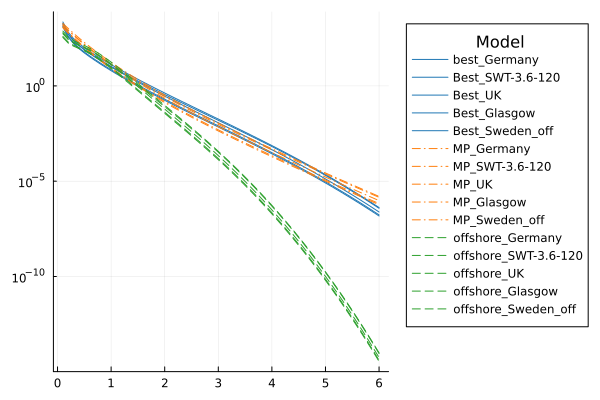

In [57]:
using Plots

diams = 0.1:0.1:6.0

# Gráfica general
dsdplot = plot(legend_title="Model", yscale=:log10, legend=:outertopright)

# BEST
plot!(dsdplot, diams, dsdbestRecommended(diams), linestyle=:solid, label="best_Germany", seriescolor=palette(:tab10)[1])
plot!(dsdplot, diams, dsdbestSeattle(diams), linestyle=:solid, label="Best_SWT-3.6-120", seriescolor=palette(:tab10)[1])
plot!(dsdplot, diams, dsdbestPC(diams), linestyle=:solid, label="Best_UK", seriescolor=palette(:tab10)[1])
plot!(dsdplot, diams, dsdbestMiami(diams), linestyle=:solid, label="Best_Glasgow", seriescolor=palette(:tab10)[1])
plot!(dsdplot, diams, dsdbestHilo(diams), linestyle=:solid, label="Best_Sweden_off", seriescolor=palette(:tab10)[1])

# MARSHAL PALMER
plot!(dsdplot, diams, dsdMPRecommended(diams), linestyle=:dashdot, label="MP_Germany", seriescolor=palette(:tab10)[2])
plot!(dsdplot, diams, dsdMPSeattle(diams), linestyle=:dashdot, label="MP_SWT-3.6-120", seriescolor=palette(:tab10)[2])
plot!(dsdplot, diams, dsdMPPC(diams), linestyle=:dashdot, label="MP_UK", seriescolor=palette(:tab10)[2])
plot!(dsdplot, diams, dsdMPMiami(diams), linestyle=:dashdot, label="MP_Glasgow", seriescolor=palette(:tab10)[2])
plot!(dsdplot, diams, dsdMPHilo(diams), linestyle=:dashdot, label="MP_Sweden_off", seriescolor=palette(:tab10)[2])

# OFFSHORE
plot!(dsdplot, diams, dsdoffshoreRecommended(diams), linestyle=:dash, label="offshore_Germany", seriescolor=palette(:tab10)[3])
plot!(dsdplot, diams, dsdoffshoreSeattle(diams), linestyle=:dash, label="offshore_SWT-3.6-120", seriescolor=palette(:tab10)[3])
plot!(dsdplot, diams, dsdoffshorePC(diams), linestyle=:dash, label="offshore_UK", seriescolor=palette(:tab10)[3])
plot!(dsdplot, diams, dsdoffshoreMiami(diams), linestyle=:dash, label="offshore_Glasgow", seriescolor=palette(:tab10)[3])
plot!(dsdplot, diams, dsdoffshoreHilo(diams), linestyle=:dash, label="offshore_Sweden_off", seriescolor=palette(:tab10)[3])

# Mostrar la gráfica
display(dsdplot)
#savefig(dsdplot, "dsd_plot.png")


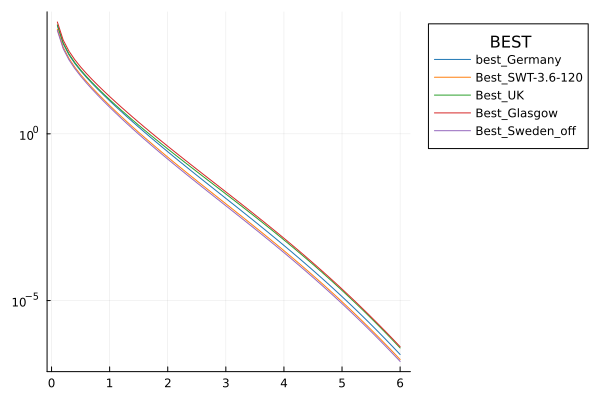

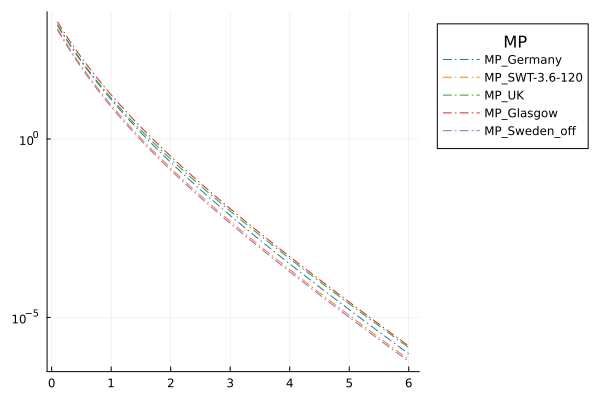

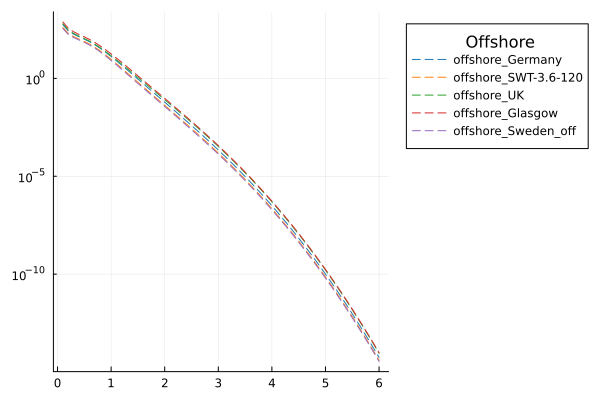

In [54]:
using Plots

diams = 0.1:0.1:6.0

# Gráfica general
dsdplot_general = plot(legend_title="Model", yscale=:log10, legend=:outertopright)

# BEST
dsdplot_best = plot(legend_title="BEST", yscale=:log10, legend=:outertopright)
plot!(dsdplot_best, diams, dsdbestRecommended(diams), linestyle=:solid, label="best_Germany", seriescolor=palette(:tab10)[1])
plot!(dsdplot_best, diams, dsdbestSeattle(diams), linestyle=:solid, label="Best_SWT-3.6-120", seriescolor=palette(:tab10)[2])
plot!(dsdplot_best, diams, dsdbestPC(diams), linestyle=:solid, label="Best_UK", seriescolor=palette(:tab10)[3])
plot!(dsdplot_best, diams, dsdbestMiami(diams), linestyle=:solid, label="Best_Glasgow", seriescolor=palette(:tab10)[4])
plot!(dsdplot_best, diams, dsdbestHilo(diams), linestyle=:solid, label="Best_Sweden_off", seriescolor=palette(:tab10)[5])

# MARSHAL PALMER
dsdplot_mp = plot(legend_title="MP", yscale=:log10, legend=:outertopright)
plot!(dsdplot_mp, diams, dsdMPRecommended(diams), linestyle=:dashdot, label="MP_Germany", seriescolor=palette(:tab10)[1])
plot!(dsdplot_mp, diams, dsdMPSeattle(diams), linestyle=:dashdot, label="MP_SWT-3.6-120", seriescolor=palette(:tab10)[2])
plot!(dsdplot_mp, diams, dsdMPPC(diams), linestyle=:dashdot, label="MP_UK", seriescolor=palette(:tab10)[3])
plot!(dsdplot_mp, diams, dsdMPMiami(diams), linestyle=:dashdot, label="MP_Glasgow", seriescolor=palette(:tab10)[4])
plot!(dsdplot_mp, diams, dsdMPHilo(diams), linestyle=:dashdot, label="MP_Sweden_off", seriescolor=palette(:tab10)[5])

# OFFSHORE
dsdplot_offshore = plot(legend_title="Offshore", yscale=:log10, legend=:outertopright)
plot!(dsdplot_offshore, diams, dsdoffshoreRecommended(diams), linestyle=:dash, label="offshore_Germany", seriescolor=palette(:tab10)[1])
plot!(dsdplot_offshore, diams, dsdoffshoreSeattle(diams), linestyle=:dash, label="offshore_SWT-3.6-120", seriescolor=palette(:tab10)[2])
plot!(dsdplot_offshore, diams, dsdoffshorePC(diams), linestyle=:dash, label="offshore_UK", seriescolor=palette(:tab10)[3])
plot!(dsdplot_offshore, diams, dsdoffshoreMiami(diams), linestyle=:dash, label="offshore_Glasgow", seriescolor=palette(:tab10)[4])
plot!(dsdplot_offshore, diams, dsdoffshoreHilo(diams), linestyle=:dash, label="offshore_Sweden_off", seriescolor=palette(:tab10)[5])

# Mostrar las gráficas
display(dsdplot_best)
display(dsdplot_mp)
display(dsdplot_offshore)


In [1]:
using Plots
diams = 0.1:0.1:6.0
Crplot=plot(legend_title="Model")

plot!(Crplot,diams,(diams.^2) .* dsdbestRecommended(diams),linestyle=:solid,label="Best_Germany", seriescolor=palette(:tab10)[1])
plot!(Crplot,diams,(diams.^2) .*dsdbestSeattle(diams),linestyle=:solid,label="Best_SWT-3.6-120",seriescolor=palette(:tab10)[2])
plot!(Crplot,diams,(diams.^2) .*dsdbestPC(diams),linestyle=:solid,label="Best_UK",seriescolor=palette(:tab10)[3])
plot!(Crplot,diams,(diams.^2) .*dsdbestMiami(diams),linestyle=:solid,label="Best_Glasgow",seriescolor=palette(:tab10)[4])
plot!(Crplot,diams,(diams.^2) .*dsdbestHilo(diams),linestyle=:solid,label="Best_Sweden",seriescolor=palette(:tab10)[5])

plot!(Crplot,diams,(diams.^2) .*dsdMPRecommended(diams),linestyle=:dashdot,label="MP_Germany",seriescolor=palette(:tab10)[1])
plot!(Crplot,diams,(diams.^2) .*dsdMPSeattle(diams),linestyle=:dashdot,label="MP_SWT-3.6-120",seriescolor=palette(:tab10)[2])
plot!(Crplot,diams,(diams.^2) .*dsdMPPC(diams),linestyle=:dashdot,label="MP_UK",seriescolor=palette(:tab10)[3])
plot!(Crplot,diams,(diams.^2) .*dsdMPMiami(diams),linestyle=:dashdot,label="MP_Glasgow",seriescolor=palette(:tab10)[4])
plot!(Crplot,diams,(diams.^2) .*dsdMPHilo(diams),linestyle=:dashdot,label="MP_Sweden",seriescolor=palette(:tab10)[5])

plot!(Crplot,diams,(diams.^2) .*dsdoffshoreRecommended(diams),linestyle=:dash,label="offshore_Germany",seriescolor=palette(:tab10)[1])
plot!(Crplot,diams,(diams.^2) .*dsdoffshoreSeattle(diams),linestyle=:dash,label="offshore_SWT-3.6-120",seriescolor=palette(:tab10)[2])
plot!(Crplot,diams,(diams.^2) .*dsdoffshorePC(diams),linestyle=:dash,label="offshore_UK",seriescolor=palette(:tab10)[3])
plot!(Crplot,diams,(diams.^2) .*dsdoffshoreMiami(diams),linestyle=:dash,label="offshore_Glasgow",seriescolor=palette(:tab10)[4])
plot!(Crplot,diams,(diams.^2) .*dsdoffshoreHilo(diams),linestyle=:dash,label="offshore_Sweden",seriescolor=palette(:tab10)[5])


UndefVarError: UndefVarError: `dsdbestRecommended` not defined in `Main`
Suggestion: check for spelling errors or missing imports.